Je krijgt van ons een csv bestand met de naam “persoonsgegevens.csv”. 
Het bestand bevat informatie van personen:
-	Kolom 1: het rijksregisternummer van de persoon
-	Kolom 2: de familienaam van de persoon
-	Kolom 3: de voornaam van de persoon

Een rijksregisternummer heeft volgend formaat: 
-	3 keer 2 cijfers onderling gescheiden door een punt; dit is de geboortedatum van de persoon in de vorm jj.mm.dd (eerste twee cijfers zijn de 2 laatste cijfers van het geboortejaar, dan een punt, dan twee cijfers overeenkomstig de geboortemaand, dan een punt en dan nog eens twee cijfers overeenkomstig de geboortedag)
-	Een streepje “-“
-	Drie cijfers: dit is volgnummer om personen die op dezelfde dag geboren zijn van elkaar te onderscheiden; vrouwen krijgen een even volgnummer, mannen een oneven volgnummer
-	Een punt
-	Twee cijfers die als controlegetal werken; hoe deze controle gebeurd is voor deze opgave niet van belang
Een vrouw geboren op 28 juli 1994 zou volgend rijksregisternummer kunnen hebben: 
94.07.28-124.89.
We wensen een applicatie te maken om een overzicht te creëren van het aantal geboortes per dag van de week. In dit overzicht worden de dagen van de week voorgesteld met de Engelstalige benamingen, dus van "Monday" tot "Sunday".
Vul in volgende de nodige stukjes code toe.

Lees het bestand "personal_data.csv" in een panda Dataframe met de naam "data"

In [1]:
import pandas as pd
import datetime
import re 

data = pd.read_csv('personal_data.csv', delimiter=';')

Controleer of dit goed gedaan is door een aantal van de eerste rijen te tonen.

In [2]:
data[0:5]

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
1,96.99.11-133.71,Janssens,Jef
2,02.122.12-122.32,Elen,Marieke
3,99.07.01-005.56,Hendriks,Hendrik
4,93.07.25-1248.89,Lemmens,Elke


Wijzig de rijksregisternummers die niet aan het juiste formaat voldoen (beschouw voorlopig enkel als goed formaat : 2cijfers.2cijfers.2cijfers-3cijfers.2cijfers) door None.
Toon opnieuw de eerste rijen om na te gaan of dit gelukt is.

In [3]:
def validate_rijkregisternr(num:str):
    match = re.fullmatch(r'\d{2}\.\d{2}\.\d{2}-\d{3}\.\d{2}', num)
    if not match:
        return 'None'
    else:
        return num
data['rijksregisternummer'] = data['rijksregisternummer'].apply(validate_rijkregisternr)

data[0:5]

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
1,96.99.11-133.71,Janssens,Jef
2,None,Elen,Marieke
3,99.07.01-005.56,Hendriks,Hendrik
4,None,Lemmens,Elke


Wijzig de rijksregisternummers waarvan de eerste 8 tekens niet overeenkomen met een datum door None.
Toon opnieuw de eerste rijen om na te gaan of dit gelukt is.

In [4]:
def validate_first_8_digits(num:str):
    maand = num[3:5]
    dag = num[7:8]
    if num == 'None':
        return num
    else:
        if int(maand) > 12:
            return 'None'
        elif (maand in ('01', '03', '05', '07', '08', '10', '12') and int(dag) >31) or (maand == '02' and int(dag) >29):
            return 'None'
        elif maand in ('04', '06', '09', '11') and int(dag) > 30:
            return 'None'
        else:
            return num
    
data['rijksregisternummer'] = data['rijksregisternummer'].apply(validate_first_8_digits)

data[0:5]

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
1,None,Janssens,Jef
2,None,Elen,Marieke
3,99.07.01-005.56,Hendriks,Hendrik
4,None,Lemmens,Elke


Schrap de rijen in het dataframe waarin de waarde None in één van de kolommen voorkomt.
Toon opnieuw de eerste rijen om na te gaan of dit gelukt is.

In [5]:
def filter_data(data_string:str):
    if data_string == 'None':
        return False
    else:
        return True
data['valid_rijknum'] = data['rijksregisternummer'].apply(filter_data)
data = data[data['valid_rijknum']].drop(columns=['valid_rijknum'])
data[0:5]

,rijksregisternummer,naam,voornaam
0,94.07.25-124.89,Lemmens,Elke
3,99.07.01-005.56,Hendriks,Hendrik
5,00.10.11-133.71,Janssens,Jef
7,89.07.01-005.56,Hendriks,Hendrik
8,99.07.25-124.89,Lemmens,Elke


Wijzig het dataframe door een kolom toe te voegen met de naam “geboortedatum” die de geboortedatum als datetime object voorstelt.
Toon opnieuw de eerste rijen om na te gaan of dit gelukt is.

In [9]:
def get_geboortedatum(num:str):
    num = num[:8]
    return datetime.datetime.strptime(num, '%y.%m.%d')
data['geboortedatum'] = data['rijksregisternummer'].apply(get_geboortedatum)

data[0:5]

,rijksregisternummer,naam,voornaam,geboortedatum
0,94.07.25-124.89,Lemmens,Elke,1994-07-25
3,99.07.01-005.56,Hendriks,Hendrik,1999-07-01
5,00.10.11-133.71,Janssens,Jef,2000-10-11
7,89.07.01-005.56,Hendriks,Hendrik,1989-07-01
8,99.07.25-124.89,Lemmens,Elke,1999-07-25


Wijzig het dataframe door een kolom toe te voegen met de naam “dag” die de dag in de week voorstelt dat de persoon geboren is; de dagen zijn de Engelstalige namen voor de dagen.
Toon opnieuw de eerste rijen om na te gaan of dit gelukt is.

In [21]:
def get_geboortedag(date:datetime):
    return datetime.datetime.strftime(date, "%a")

data['dag'] = data['geboortedatum'].apply(get_geboortedag)

data[0:5]

,rijksregisternummer,naam,voornaam,geboortedatum,dag
0,94.07.25-124.89,Lemmens,Elke,1994-07-25,Mon
3,99.07.01-005.56,Hendriks,Hendrik,1999-07-01,Thu
5,00.10.11-133.71,Janssens,Jef,2000-10-11,Wed
7,89.07.01-005.56,Hendriks,Hendrik,1989-07-01,Sat
8,99.07.25-124.89,Lemmens,Elke,1999-07-25,Sun


Voer volgend stukje code uit.

In [16]:
data["dag"] = pd.Categorical(data["dag"],["Monday","Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])
data.head()

,rijksregisternummer,naam,voornaam,geboortedatum,dag
0,94.07.25-124.89,Lemmens,Elke,1994-07-25,NaN
3,99.07.01-005.56,Hendriks,Hendrik,1999-07-01,NaN
5,00.10.11-133.71,Janssens,Jef,2000-10-11,NaN
7,89.07.01-005.56,Hendriks,Hendrik,1989-07-01,NaN
8,99.07.25-124.89,Lemmens,Elke,1999-07-25,NaN


Toon een visueel overzicht in de vorm van een histogram van het aantal geboortes per dag van de week. 

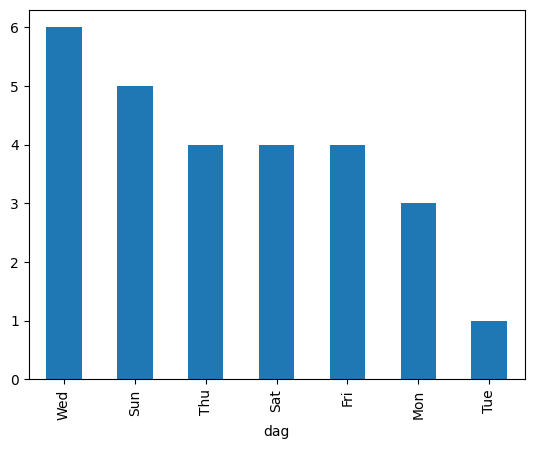

In [25]:
graf = data['dag'].value_counts().plot(kind='bar')